In [1]:
from models import yolov5s
import torch
from torch import nn

In [2]:
anchors = [[10, 13, 16, 30, 33, 23],
 [30, 61, 62, 45, 59, 119],
 [116, 90, 156, 198, 373, 326]]

In [3]:
yolo = yolov5s.Yolov5Small(3, 80)

In [4]:
yolo

Yolov5Small(
  (focus): Focus(
    (concat): Concat()
    (conv_bn_act): ConvBnAct(
      (conv): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): Hardswish()
    )
  )
  (backbone_stage1_conv): ConvBnAct(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act): Hardswish()
  )
  (backbone_stage1_bscp): BottleneckCSP(
    (conv_bn_act_1): ConvBnAct(
      (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): Hardswish()
    )
    (conv_2): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (conv_1): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (concat): Concat()
    (a

In [5]:
torch.save(yolo.state_dict(), './simple_yolo_state_dict.pkl', _use_new_zipfile_serialization=False)

In [5]:
simple_yolo = torch.load('/home/uih/JYL/Programs/yolov5-master-version6/state_dict.pth')

In [6]:
simple_total = []
for i, (k, v) in enumerate(simple_yolo.items()):
    simple_total.append(k)
    print(f'{i}: {k}')

0: model.0.conv.conv.weight
1: model.0.conv.conv.bias
2: model.1.conv.weight
3: model.1.conv.bias
4: model.2.cv1.conv.weight
5: model.2.cv1.conv.bias
6: model.2.cv2.conv.weight
7: model.2.cv2.conv.bias
8: model.2.cv3.conv.weight
9: model.2.cv3.conv.bias
10: model.2.m.0.cv1.conv.weight
11: model.2.m.0.cv1.conv.bias
12: model.2.m.0.cv2.conv.weight
13: model.2.m.0.cv2.conv.bias
14: model.3.conv.weight
15: model.3.conv.bias
16: model.4.cv1.conv.weight
17: model.4.cv1.conv.bias
18: model.4.cv2.conv.weight
19: model.4.cv2.conv.bias
20: model.4.cv3.conv.weight
21: model.4.cv3.conv.bias
22: model.4.m.0.cv1.conv.weight
23: model.4.m.0.cv1.conv.bias
24: model.4.m.0.cv2.conv.weight
25: model.4.m.0.cv2.conv.bias
26: model.4.m.1.cv1.conv.weight
27: model.4.m.1.cv1.conv.bias
28: model.4.m.1.cv2.conv.weight
29: model.4.m.1.cv2.conv.bias
30: model.4.m.2.cv1.conv.weight
31: model.4.m.2.cv1.conv.bias
32: model.4.m.2.cv2.conv.weight
33: model.4.m.2.cv2.conv.bias
34: model.5.conv.weight
35: model.5.conv.b

In [8]:
simple_layers = []
simple_weight_shape = []
mark = 0

for i, (k, v) in enumerate(simple_yolo.items()):
    if 'model.24.m' in k:
        if "weight" in k:
            simple_layers.append('conv.weight')
        else:
            simple_layers.append('conv.bias')
    elif 'running_mean' in k:
        simple_layers.append('bn.running_mean')
    elif 'running_var' in k:
        simple_layers.append('bn.running_var')
    elif 'num_batches_tracked' in k:
        simple_layers.append('bn.num_batches_tracked')
    elif 'weight' in k:
        if 'bn' in k:
            simple_layers.append('bn.weight')
        else:
            simple_layers.append('conv.weight')
    elif 'bias' in k:
        if 'bn' in k:
            simple_layers.append('bn.bias')
        else:
            simple_layers.append('conv.bias')
    
    else:
        print(f'conv in {k!r}: {"conv" in k}')
        
    if (len(simple_layers) - mark > 1):
        print(k, len(simple_layers))
    mark = len(simple_layers)

In [9]:
len(simple_layers)

368

In [10]:
simple_layers

['bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.weigh

In [11]:
import yaml

v5 = torch.load('./normal_torch_state_dict.pkl', map_location='cpu')

In [22]:
total = []
for i, (k, v) in enumerate(v5.items()):
    total.append(k)
    print(f'{i}: {k}')

0: model.0.conv.conv.weight
1: model.0.conv.bn.weight
2: model.0.conv.bn.bias
3: model.0.conv.bn.running_mean
4: model.0.conv.bn.running_var
5: model.0.conv.bn.num_batches_tracked
6: model.1.conv.weight
7: model.1.bn.weight
8: model.1.bn.bias
9: model.1.bn.running_mean
10: model.1.bn.running_var
11: model.1.bn.num_batches_tracked
12: model.2.cv1.conv.weight
13: model.2.cv1.bn.weight
14: model.2.cv1.bn.bias
15: model.2.cv1.bn.running_mean
16: model.2.cv1.bn.running_var
17: model.2.cv1.bn.num_batches_tracked
18: model.2.cv2.weight
19: model.2.cv3.weight
20: model.2.cv4.conv.weight
21: model.2.cv4.bn.weight
22: model.2.cv4.bn.bias
23: model.2.cv4.bn.running_mean
24: model.2.cv4.bn.running_var
25: model.2.cv4.bn.num_batches_tracked
26: model.2.bn.weight
27: model.2.bn.bias
28: model.2.bn.running_mean
29: model.2.bn.running_var
30: model.2.bn.num_batches_tracked
31: model.2.m.0.cv1.conv.weight
32: model.2.m.0.cv1.bn.weight
33: model.2.m.0.cv1.bn.bias
34: model.2.m.0.cv1.bn.running_mean
35: 

In [13]:
len(total)

370

In [14]:
layers = []
layer_weight_shape = []
mark = 0

for i, (k, v) in enumerate(v5.items()):
    if 'model.24.m' in k:
        if "weight" in k:
            layers.append('conv.weight')
        else:
            layers.append('conv.bias')
    elif 'running_mean' in k:
        layers.append('bn.running_mean')
        layer_weight_shape.append(v.shape)
    elif 'running_var' in k:
        layers.append('bn.running_var')
        layer_weight_shape.append(v.shape)
    elif 'num_batches_tracked' in k:
        layers.append('bn.num_batches_tracked')
        layer_weight_shape.append(v.shape)
    elif 'weight' in k:
        if 'bn' in k:
            layers.append('bn.weight')
            layer_weight_shape.append(v.shape)
        else:
            layers.append('conv.weight')
            layer_weight_shape.append(v.shape)
    elif 'bias' in k:
        if 'bn' in k:
            layers.append('bn.bias')
        else:
            layers.append('conv.bias')
    
    else:
        print(f'conv in {k!r}: {"conv" in k}')
        
    if (len(layers) - mark > 1):
        print(k, len(layers))
    mark = len(layers)

conv in 'model.24.anchors': False
conv in 'model.24.anchor_grid': False


In [15]:
len(layers)

368

In [16]:
layers

['conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'conv.weight',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weight',
 'bn.weight',
 'bn.bias',
 'bn.running_mean',
 'bn.running_var',
 'bn.num_batches_tracked',
 'conv.weigh

In [19]:
for i, (simple_layer, v5_layer) in enumerate(zip(simple_layers, layers)):
    print(f'{i}: {simple_layer} --> {v5_layer}')

0: bn.weight --> conv.weight
1: bn.weight --> bn.weight
2: bn.bias --> bn.bias
3: bn.running_mean --> bn.running_mean
4: bn.running_var --> bn.running_var
5: bn.num_batches_tracked --> bn.num_batches_tracked
6: conv.weight --> conv.weight
7: bn.weight --> bn.weight
8: bn.bias --> bn.bias
9: bn.running_mean --> bn.running_mean
10: bn.running_var --> bn.running_var
11: bn.num_batches_tracked --> bn.num_batches_tracked
12: bn.weight --> conv.weight
13: bn.weight --> bn.weight
14: bn.bias --> bn.bias
15: bn.running_mean --> bn.running_mean
16: bn.running_var --> bn.running_var
17: bn.num_batches_tracked --> bn.num_batches_tracked
18: bn.weight --> conv.weight
19: bn.weight --> conv.weight
20: bn.bias --> conv.weight
21: bn.running_mean --> bn.weight
22: bn.running_var --> bn.bias
23: bn.num_batches_tracked --> bn.running_mean
24: bn.weight --> bn.running_var
25: bn.weight --> bn.num_batches_tracked
26: bn.bias --> bn.weight
27: bn.running_mean --> bn.bias
28: bn.running_var --> bn.running_

In [20]:
simple_total[20]

'stage1_bscp.blocks.0.conv_bn_act_1.bn.bias'

In [21]:
total[20]

'model.2.cv4.conv.weight'

In [34]:
for simple_shape, v5_shape in zip(simple_layers_weight_shape, layer_weight_shape):
    print(f'{simple_shape} --> {v5_shape}')

torch.Size([32, 12, 3, 3]) --> torch.Size([32, 12, 3, 3])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([]) --> torch.Size([])
torch.Size([64, 32, 3, 3]) --> torch.Size([64, 32, 3, 3])
torch.Size([64]) --> torch.Size([64])
torch.Size([64]) --> torch.Size([64])
torch.Size([64]) --> torch.Size([64])
torch.Size([64]) --> torch.Size([64])
torch.Size([]) --> torch.Size([])
torch.Size([32, 64, 1, 1]) --> torch.Size([32, 64, 1, 1])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([32]) --> torch.Size([32])
torch.Size([]) --> torch.Size([])
torch.Size([32, 32, 1, 1]) --> torch.Size([32, 64, 1, 1])
torch.Size([32]) --> torch.Size([32, 32, 1, 1])
torch.Size([32]) --> torch.Size([64, 64, 1, 1])
torch.Size([32]) --> torch.Size([64])
torch.Size([32]) --> torch.Size([64])
torch.Size([]) --> torch.Size([64])
to

In [166]:
def mosaic(imgs, mosaic_shape: list):
    """
    mosaic four images
    :param imgs:
    :param labels:
    :param mosaic_shape: a list: [h, w]
    """
    assert len(imgs) == 4

    s = mosaic_shape[0] // 2
    xc, yc = [int(random.uniform(mosaic_shape[0]//4, mosaic_shape[0]*3//4)) for _ in range(2)]
    print(f'center: {yc, xc}')
    img_mosaic = np.full(shape=mosaic_shape + [3], dtype=np.uint8, fill_value=125)
    for i, img in enumerate(imgs):
        h, w = img.shape[:2]
        if i == 0:
            xmin_o, ymin_o, xmax_o, ymax_o = max(xc-w, 0), max(yc-h, 0), xc, yc
        elif i == 1:
            xmin_o, ymin_o, xmax_o, ymax_o = xc, max(yc-h, 0), min(xc+w, 2*s), yc
        elif i == 2:
            xmin_o, ymin_o, xmax_o, ymax_o = max(xc-w, 0), yc, xc, min(yc+h, 2*s)
        else:
            xmin_o, ymin_o, xmax_o, ymax_o = xc, yc, min(xc+w, 2*s), min(yc+h, 2*s)

        xc_i, yc_i, w_i, h_i =  w // 2, h // 2,  xmax_o-xmin_o, ymax_o-ymin_o
        detal_w_i, detal_h_i = w_i // 2, h_i // 2
        xmin_i = xc_i - detal_w_i
        ymin_i = yc_i - detal_h_i
        xmax_i = xc_i + (w_i - detal_w_i)
        ymax_i = yc_i + (h_i - detal_h_i)
        print(xmin_o, ymin_o, xmax_o, ymax_o)
        img_mosaic[ymin_o:ymax_o, xmin_o:xmax_o] = img[ymin_i:ymax_i, xmin_i:xmax_i]
    return img_mosaic

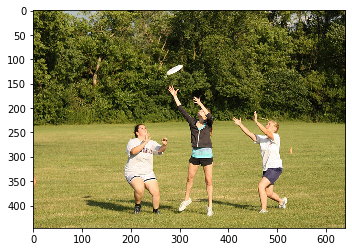

In [167]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

img = np.array(Image.open(r'/Users/ylj/Programs/Python/coco128/images/train2017/000000000625.jpg')).astype(np.uint8)
plt.imshow(img)

In [168]:
img.shape

(446, 640, 3)

center: (307, 545)
0 0 545 307
545 0 800 307
0 307 545 753
545 307 800 753


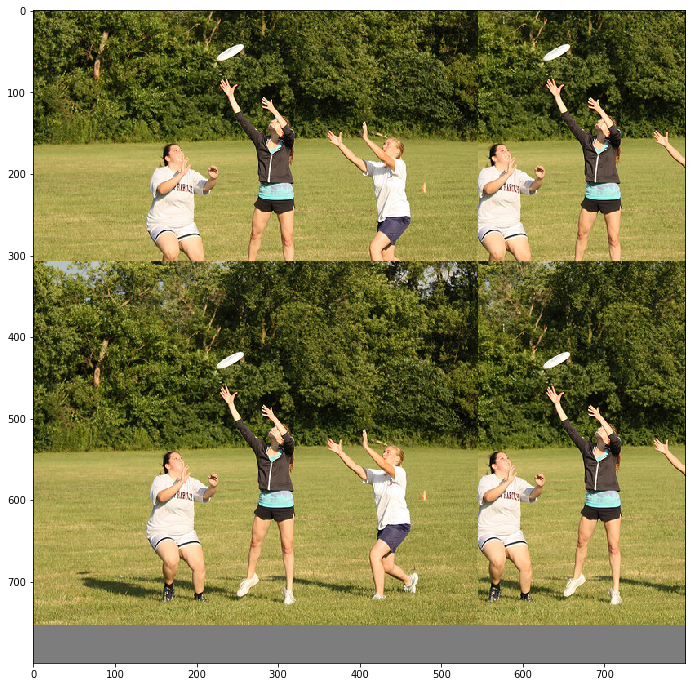

In [171]:
out = mosaic([img, img, img, img], [800, 800])
plt.figure(figsize=[12,12])
plt.imshow(out)